In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv('/content/heart_attack_prediction_dataset.csv')
data.head()

Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0   67    Male          208         158/88          72         0   
1   21    Male          389         165/93          98         1   
2   21  Female          324         174/99          72         1   
3   84    Male          383        163/100          73         1   
4   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  261404  31.251233            286   
1                 4.963459  285768  27.194973            235   
2                 9.463426  235282  28.176571            587   
3                 7.648981  125640  36.464704            378   
4                 1.514821  160555  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   
2                                4                    4     France   
3                                3                    4     Canada   
4                                1                    5   Thailand   

       Continent           Hemisphere  Heart Attack Risk  
0  South America  Southern Hemisphere                  0  
1  North America  Northern Hemisphere                  0  
2         Europe  Northern Hemisphere                  0  
3  North America  Northern Hemisphere                  0  
4           Asia  Northern Hemisphere                  0  

[5 rows x 25 columns]

In [ ]:
# Function to split "Blood Pressure" column
def split_blood_pressure(blood_pressure):
    systolic, diastolic = map(int, blood_pressure.split('/'))
    return pd.Series({'Systolic': systolic, 'Diastolic': diastolic})

# Apply the function to create new columns
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].apply(split_blood_pressure)

# Drop the original "Blood Pressure" column
data = data.drop('Blood Pressure', axis=1)

# Insert the new columns at index 4
data.insert(4, 'Systolic', data.pop('Systolic'))
data.insert(5, 'Diastolic', data.pop('Diastolic'))

# Display the updated dataset
#print(df)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Systolic                         8763 non-null   int64  
 5   Diastolic                        8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
data.head()

Age     Sex  Cholesterol  Heart Rate  Systolic  Diastolic  Diabetes  \
0   67    Male          208          72       158         88         0   
1   21    Male          389          98       165         93         1   
2   21  Female          324          72       174         99         1   
3   84    Male          383          73       163        100         1   
4   66    Male          318          93        91         88         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [ ]:
# List of features to keep
selected_features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate','Systolic',	'Diastolic', 'Diabetes',
                      'Family History', 'Smoking','Obesity', 'BMI', 'Triglycerides',
                      'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']

# List of columns to drop (unneeded columns)
columns_to_drop = [col for col in data.columns if col not in selected_features]

# Drop unneeded columns
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.head()

Age     Sex  Cholesterol  Heart Rate  Systolic  Diastolic  Diabetes  \
0   67    Male          208          72       158         88         0   
1   21    Male          389          98       165         93         1   
2   21  Female          324          72       174         99         1   
3   84    Male          383          73       163        100         1   
4   66    Male          318          93        91         88         1   

   Family History  Smoking  Obesity        BMI  Triglycerides  \
0               0        1        0  31.251233            286   
1               1        1        1  27.194973            235   
2               0        0        0  28.176571            587   
3               1        1        0  36.464704            378   
4               1        1        1  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
0                                0                    6                  0  
1                                1                    7                  0  
2                                4                    4                  0  
3                                3                    4                  0  
4                                1                    5                  0

In [ ]:
# Convert specific columns to integers
columns_to_convert = ['BMI']

# Loop through selected columns and convert to integers
for column in columns_to_convert:
    data[column] = data[column].astype(int)

In [ ]:
data.head()

Age     Sex  Cholesterol  Heart Rate  Systolic  Diastolic  Diabetes  \
0   67    Male          208          72       158         88         0   
1   21    Male          389          98       165         93         1   
2   21  Female          324          72       174         99         1   
3   84    Male          383          73       163        100         1   
4   66    Male          318          93        91         88         1   

   Family History  Smoking  Obesity  BMI  Triglycerides  \
0               0        1        0   31            286   
1               1        1        1   27            235   
2               0        0        0   28            587   
3               1        1        0   36            378   
4               1        1        1   21            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
0                                0                    6                  0  
1                                1                    7                  0  
2                                4                    4                  0  
3                                3                    4                  0  
4                                1                    5                  0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              8763 non-null   int64 
 1   Sex                              8763 non-null   object
 2   Cholesterol                      8763 non-null   int64 
 3   Heart Rate                       8763 non-null   int64 
 4   Systolic                         8763 non-null   int64 
 5   Diastolic                        8763 non-null   int64 
 6   Diabetes                         8763 non-null   int64 
 7   Family History                   8763 non-null   int64 
 8   Smoking                          8763 non-null   int64 
 9   Obesity                          8763 non-null   int64 
 10  BMI                              8763 non-null   int64 
 11  Triglycerides                    8763 non-null   int64 
 12  Physical Activity Days Per Week  8

In [ ]:
data.shape

(8763, 15)

In [ ]:
data.describe()

Age  Cholesterol   Heart Rate     Systolic    Diastolic  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     53.707977   259.877211    75.021682   135.075659    85.156111   
std      21.249509    80.863276    20.550948    26.349976    14.676565   
min      18.000000   120.000000    40.000000    90.000000    60.000000   
25%      35.000000   192.000000    57.000000   112.000000    72.000000   
50%      54.000000   259.000000    75.000000   135.000000    85.000000   
75%      72.000000   330.000000    93.000000   158.000000    98.000000   
max      90.000000   400.000000   110.000000   180.000000   110.000000   

          Diabetes  Family History      Smoking      Obesity          BMI  \
count  8763.000000     8763.000000  8763.000000  8763.000000  8763.000000   
mean      0.652288        0.492982     0.896839     0.501426    28.395527   
std       0.476271        0.499979     0.304186     0.500026     6.318770   
min       0.000000        0.000000     0.000000     0.000000    18.000000   
25%       0.000000        0.000000     1.000000     0.000000    23.000000   
50%       1.000000        0.000000     1.000000     1.000000    28.000000   
75%       1.000000        1.000000     1.000000     1.000000    34.000000   
max       1.000000        1.000000     1.000000     1.000000    39.000000   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
count    8763.000000                      8763.000000          8763.000000   
mean      417.677051                         3.489672             7.023508   
std       223.748137                         2.282687             1.988473   
min        30.000000                         0.000000             4.000000   
25%       225.500000                         2.000000             5.000000   
50%       417.000000                         3.000000             7.000000   
75%       612.000000                         5.000000             9.000000   
max       800.000000                         7.000000            10.000000   

       Heart Attack Risk  
count        8763.000000  
mean            0.358211  
std             0.479502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000

In [ ]:
data.describe().transpose()

count        mean         std    min    25%  \
Age                              8763.0   53.707977   21.249509   18.0   35.0   
Cholesterol                      8763.0  259.877211   80.863276  120.0  192.0   
Heart Rate                       8763.0   75.021682   20.550948   40.0   57.0   
Systolic                         8763.0  135.075659   26.349976   90.0  112.0   
Diastolic                        8763.0   85.156111   14.676565   60.0   72.0   
Diabetes                         8763.0    0.652288    0.476271    0.0    0.0   
Family History                   8763.0    0.492982    0.499979    0.0    0.0   
Smoking                          8763.0    0.896839    0.304186    0.0    1.0   
Obesity                          8763.0    0.501426    0.500026    0.0    0.0   
BMI                              8763.0   28.395527    6.318770   18.0   23.0   
Triglycerides                    8763.0  417.677051  223.748137   30.0  225.5   
Physical Activity Days Per Week  8763.0    3.489672    2.282687    0.0    2.0   
Sleep Hours Per Day              8763.0    7.023508    1.988473    4.0    5.0   
Heart Attack Risk                8763.0    0.358211    0.479502    0.0    0.0   

                                   50%    75%    max  
Age                               54.0   72.0   90.0  
Cholesterol                      259.0  330.0  400.0  
Heart Rate                        75.0   93.0  110.0  
Systolic                         135.0  158.0  180.0  
Diastolic                         85.0   98.0  110.0  
Diabetes                           1.0    1.0    1.0  
Family History                     0.0    1.0    1.0  
Smoking                            1.0    1.0    1.0  
Obesity                            1.0    1.0    1.0  
BMI                               28.0   34.0   39.0  
Triglycerides                    417.0  612.0  800.0  
Physical Activity Days Per Week    3.0    5.0    7.0  
Sleep Hours Per Day                7.0    9.0   10.0  
Heart Attack Risk                  0.0    1.0    1.0

In [ ]:
data.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Systolic                           0
Diastolic                          0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

In [ ]:
data.duplicated().sum()

0

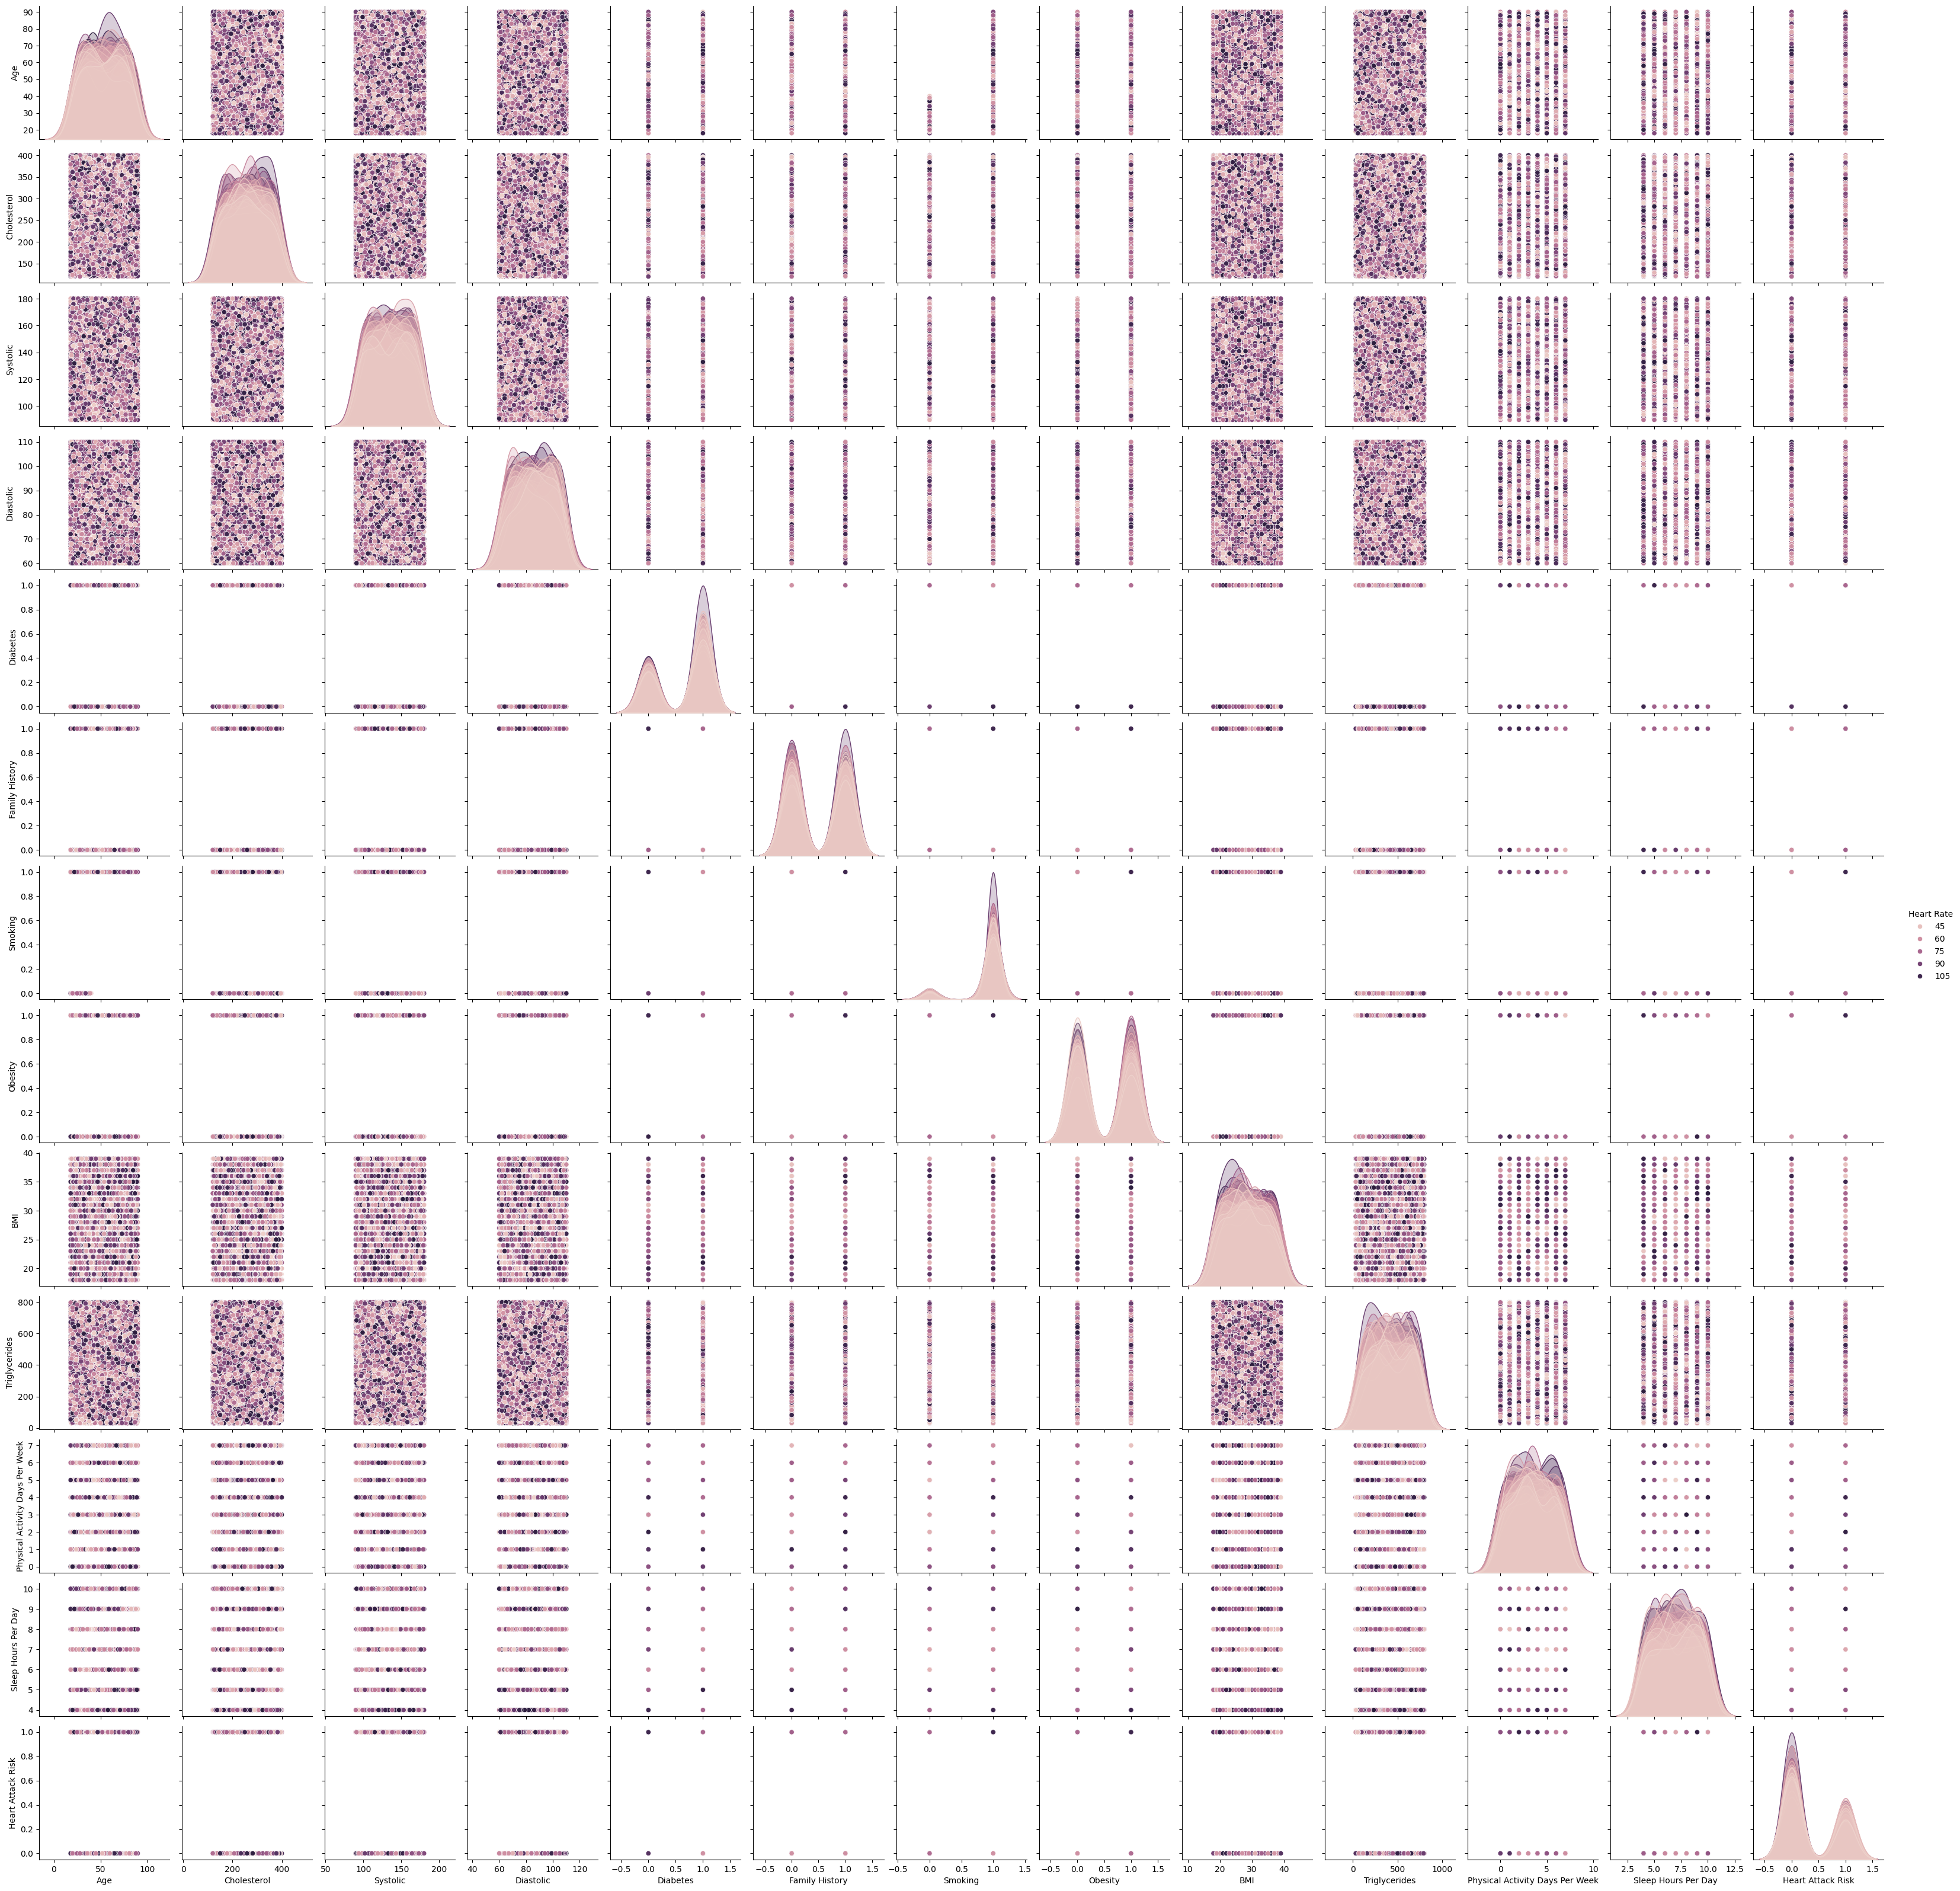

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data,hue='Heart Rate')
plt.show()

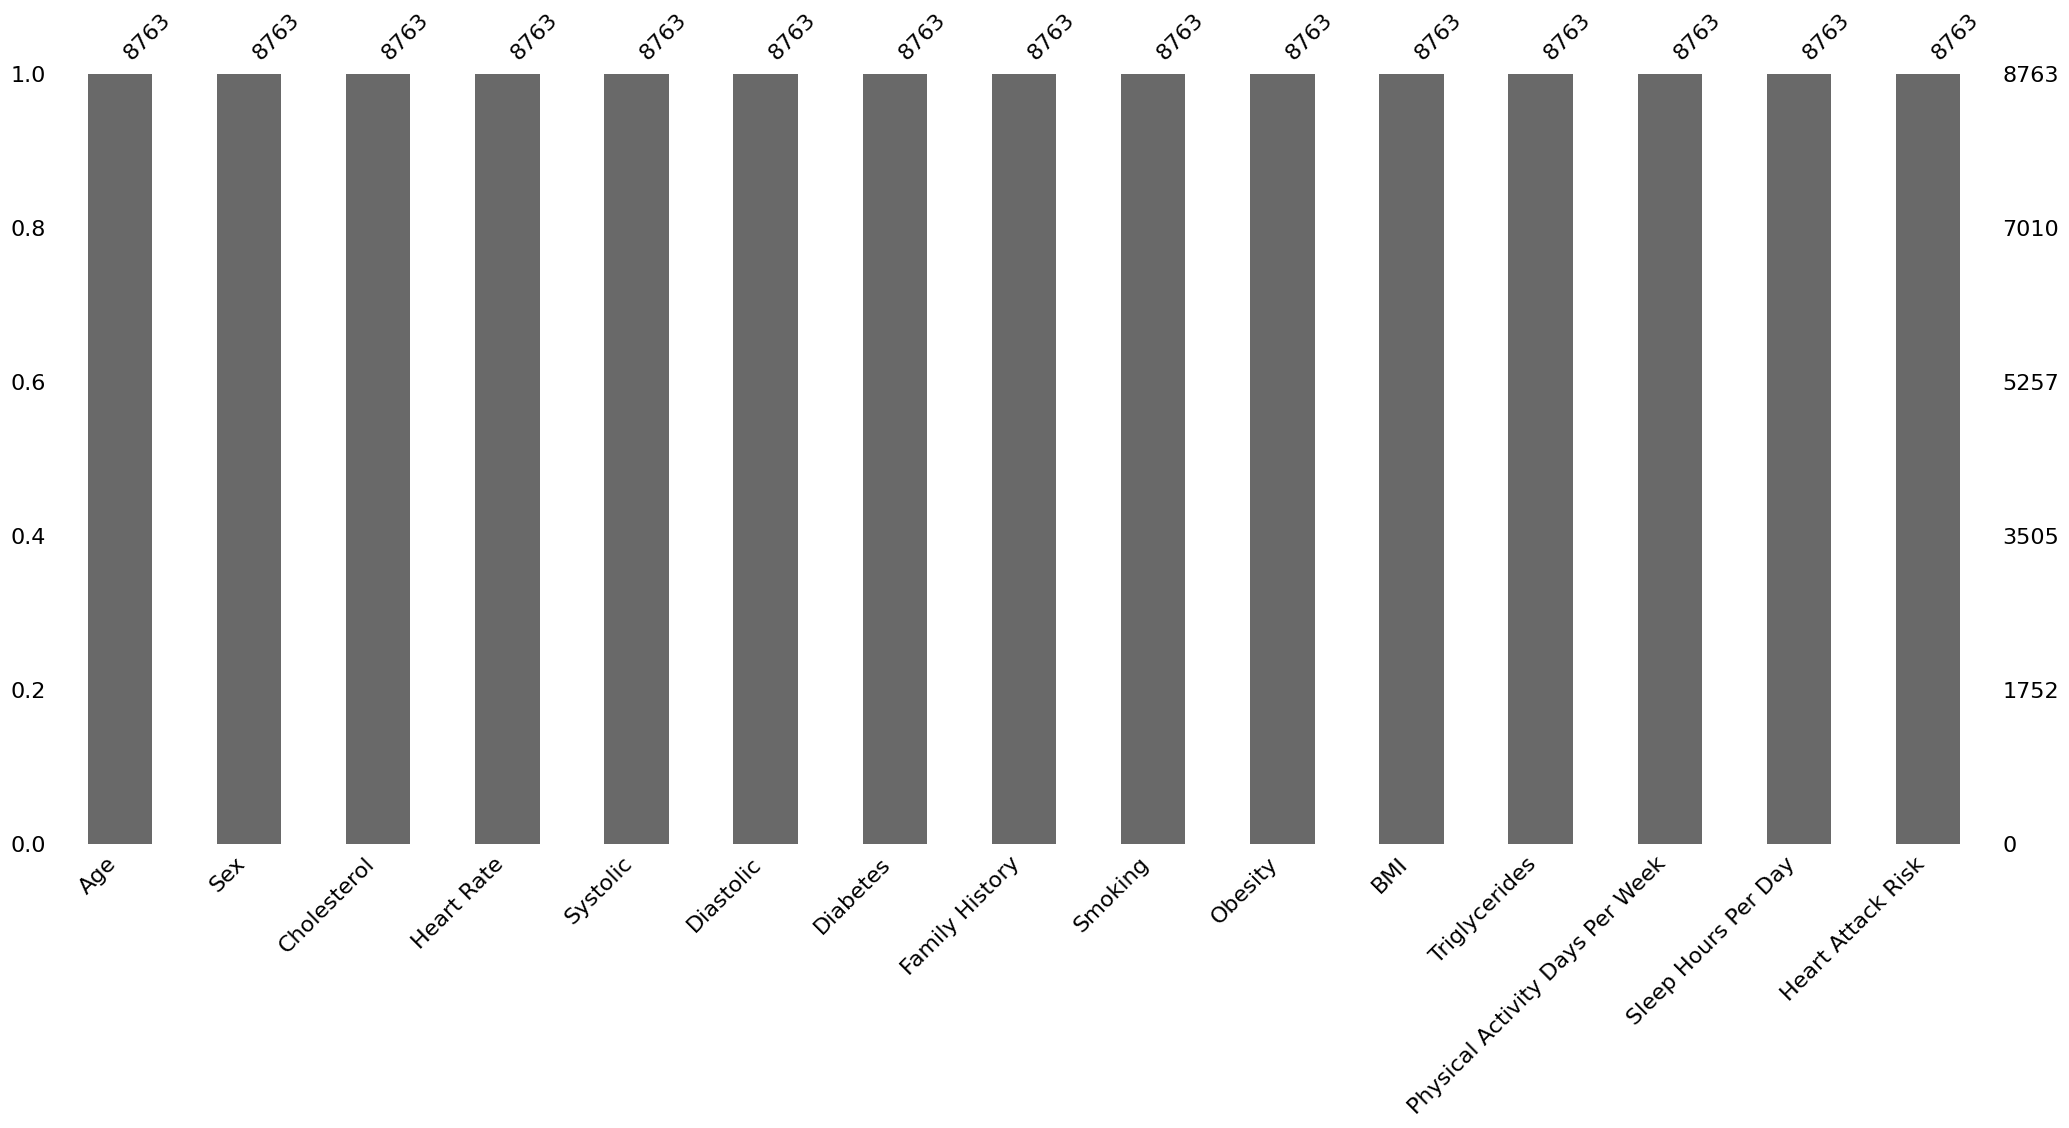

In [ ]:
import missingno as msno
msno.bar(data)
plt.show()

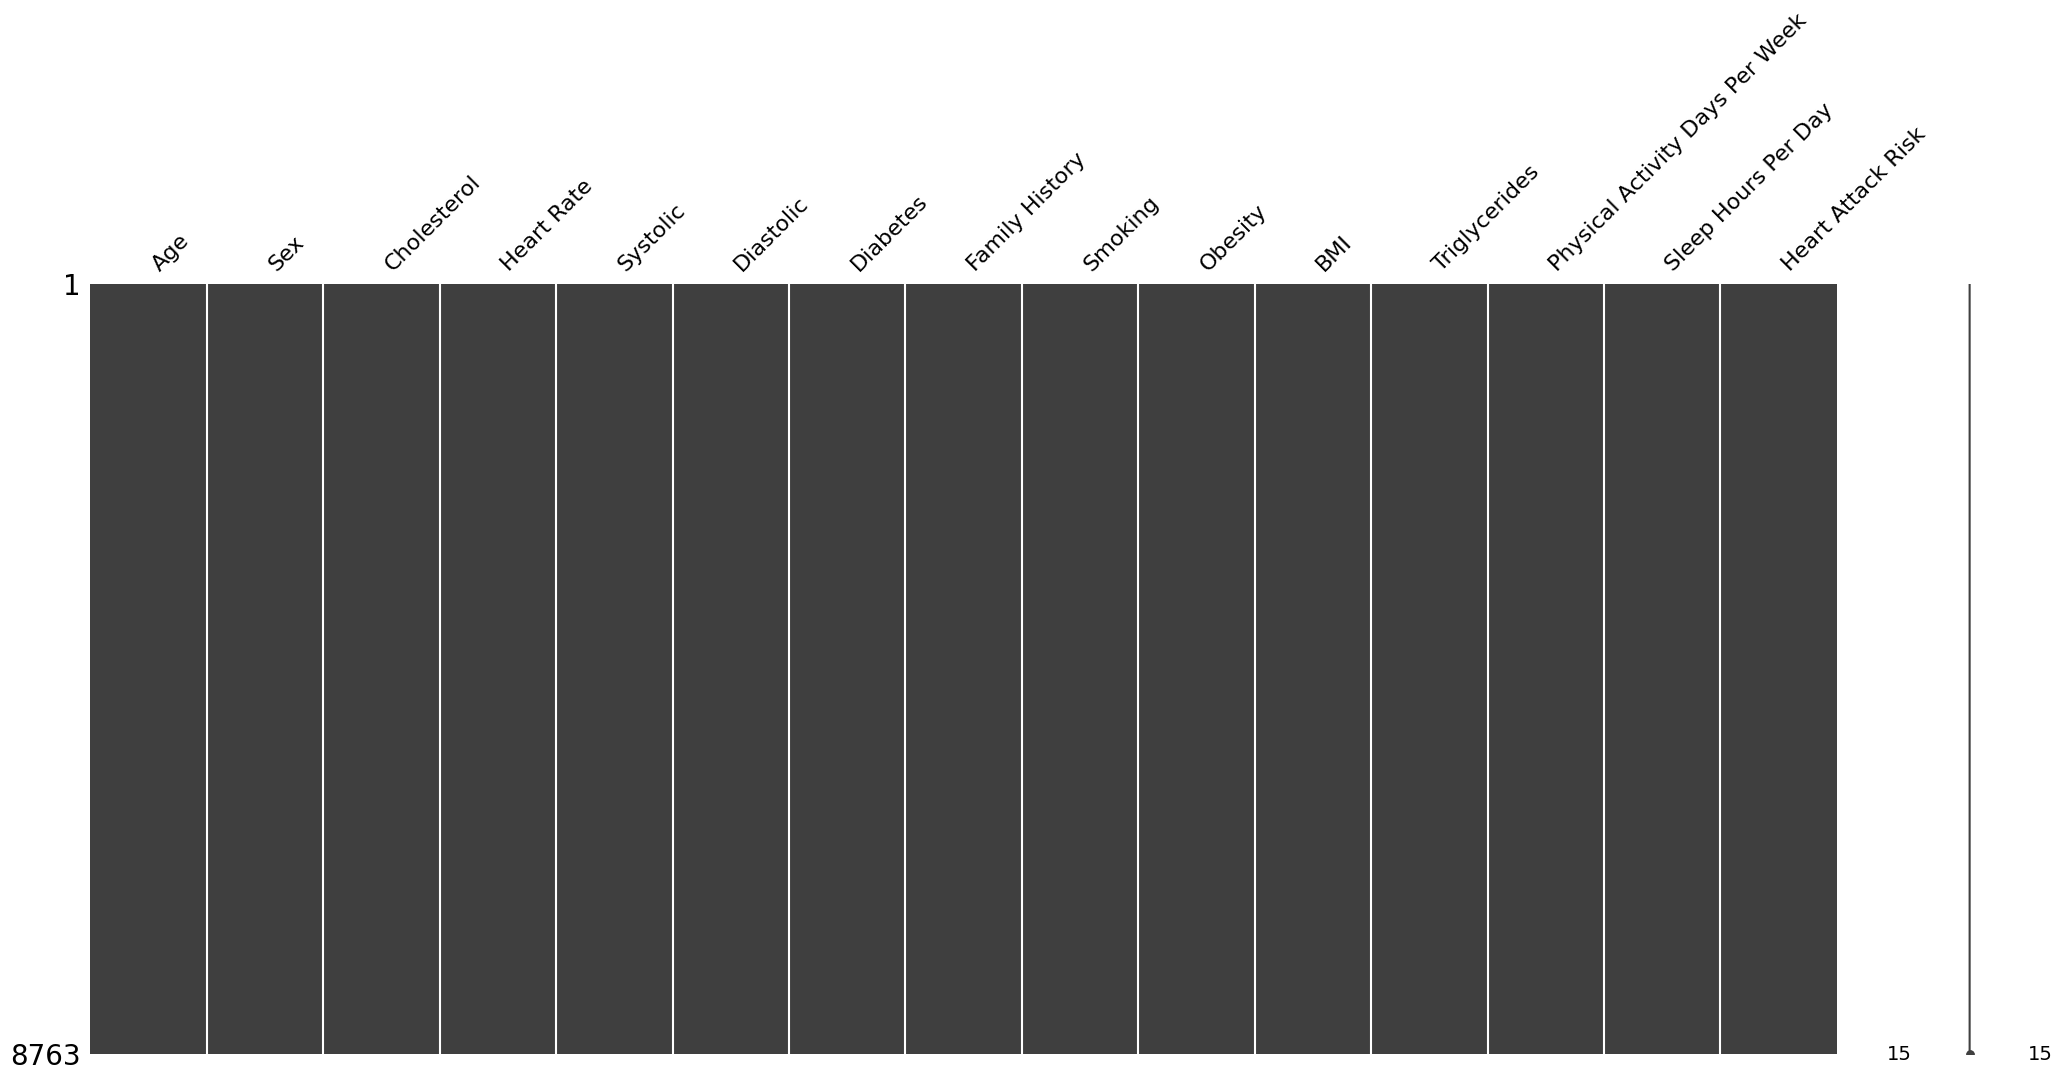

In [ ]:
msno.matrix(data)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


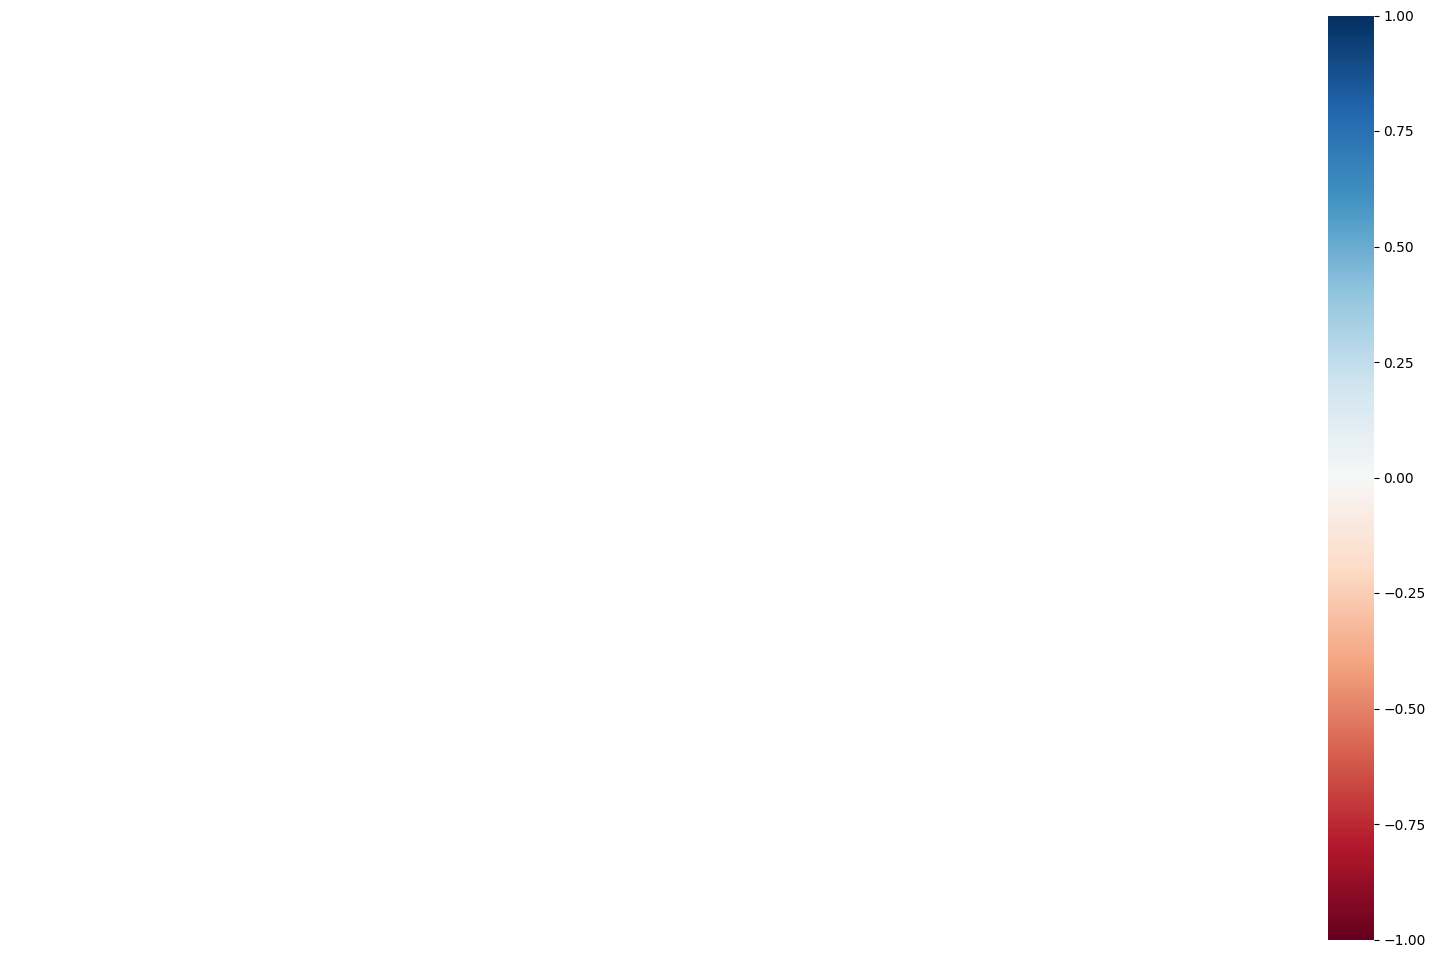

In [ ]:
msno.heatmap(data)
plt.show()

In [ ]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Sex'].value_counts(normalize=True)

Male      0.697364
Female    0.302636
Name: Sex, dtype: float64

In [ ]:
data['Sex']=data['Sex'].replace(['Male','Female'],[1,2])

In [ ]:
data.head()

Age  Sex  Cholesterol  Heart Rate  Systolic  Diastolic  Diabetes  \
0   67    1          208          72       158         88         0   
1   21    1          389          98       165         93         1   
2   21    2          324          72       174         99         1   
3   84    1          383          73       163        100         1   
4   66    1          318          93        91         88         1   

   Family History  Smoking  Obesity  BMI  Triglycerides  \
0               0        1        0   31            286   
1               1        1        1   27            235   
2               0        0        0   28            587   
3               1        1        0   36            378   
4               1        1        1   21            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
0                                0                    6                  0  
1                                1                    7                  0  
2                                4                    4                  0  
3                                3                    4                  0  
4                                1                    5                  0

In [ ]:
pd.get_dummies(data['Sex'])

1  2
0     1  0
1     1  0
2     0  1
3     1  0
4     1  0
...  .. ..
8758  1  0
8759  0  1
8760  1  0
8761  1  0
8762  0  1

[8763 rows x 2 columns]

In [ ]:
data['Age']=data['Age'].replace(['<20','20 - 35','35 - 45', '45 - 55','55 - 65','65 - 90'],['youth','young','adult','middle_age','old','oldest'])

<Axes: >

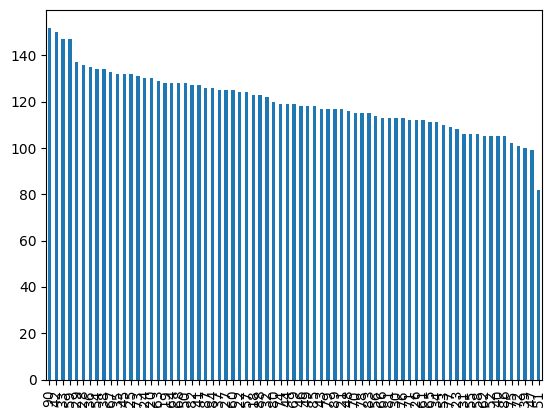

In [ ]:
data['Age'].value_counts().plot(kind='bar')

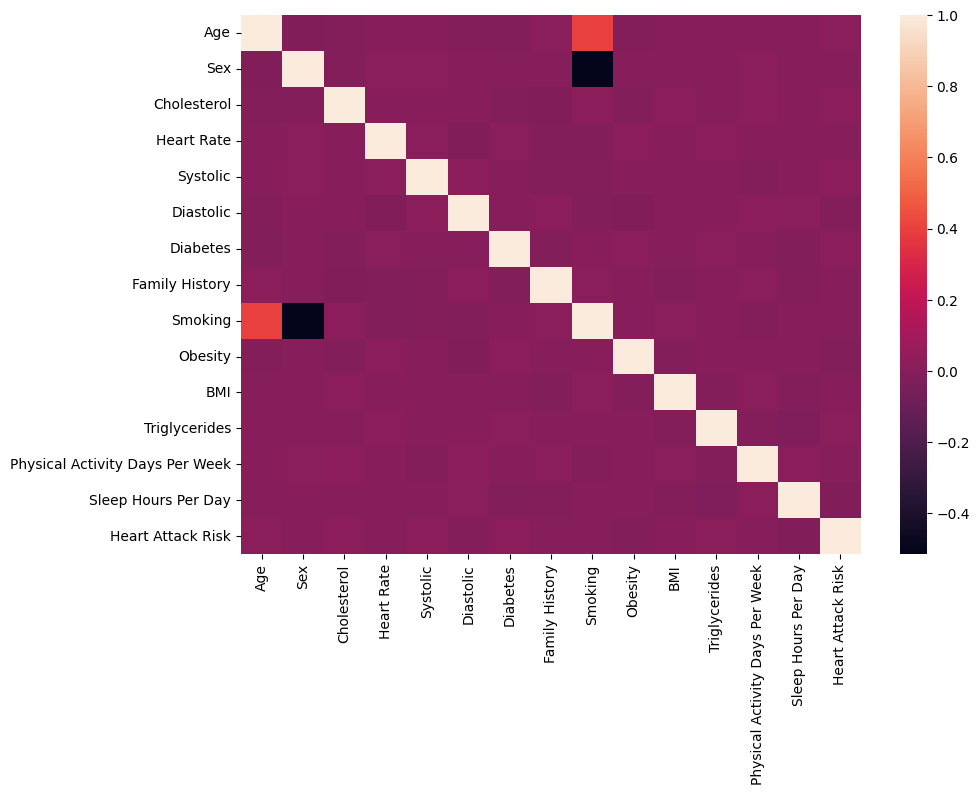

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())
plt.show()

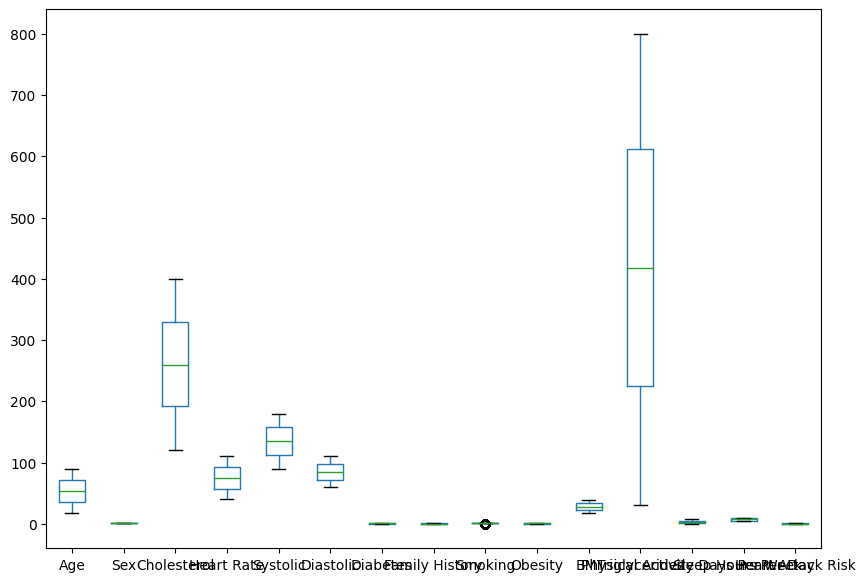

In [ ]:
plt.figure(figsize=(10,7))
data.boxplot(grid=False)
plt.show()

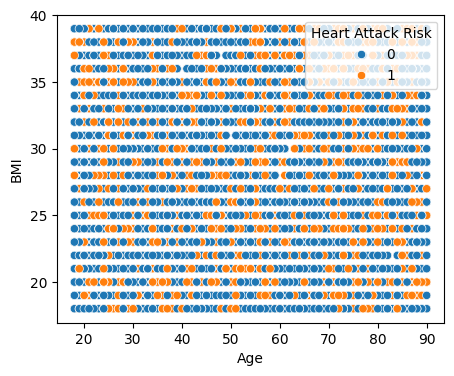

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data, x='Age',y='BMI',hue='Heart Attack Risk')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
#Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([ 53.88001304,   1.30078252, 260.42680143,  74.898761  ,
       135.0797196 ,  85.01222693,   0.6506358 ,   0.48956635,
         0.89582654,   0.5006521 ,  28.34822302, 414.71845452,
         3.49282687,   7.03064884])

In [ ]:
X_train_scaled

array([[ 1.0837645 , -0.65587362,  1.05355979, ..., -1.21493122,
         1.09925477,  0.48780459],
       [ 0.24000274,  1.52468398,  0.32716381, ..., -0.13287974,
         0.22236697,  1.49426049],
       [-0.97876426, -0.65587362, -0.92863941, ...,  1.16379351,
         1.09925477, -1.5251072 ],
       ...,
       [-1.02563992,  1.52468398, -1.12562815, ...,  1.61986479,
         0.22236697,  0.99103254],
       [ 1.45876973,  1.52468398,  0.30254021, ...,  0.6138252 ,
        -1.09296474,  1.49426049],
       [ 1.64627235, -0.65587362, -0.25149062, ...,  0.91340144,
        -1.53140864, -0.01542335]])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

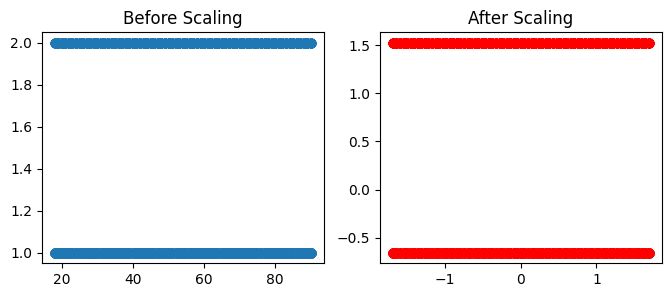

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train_scaled is a NumPy array

# Convert the NumPy array into a Pandas DataFrame
#X_train_scaled_df = pd.DataFrame(X_train_scaled)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))

# Plotting before scaling
ax1.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
ax1.set_title("Before Scaling")

# Plotting after scaling
ax2.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], color='red')  # Assuming Triglycerides is the first column and Cholesterol is the second column after scaling
ax2.set_title("After Scaling")

plt.show()


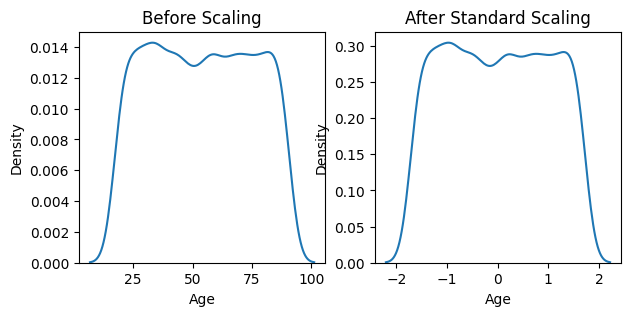

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train.iloc[:, 0], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled.iloc[:, 0], ax=ax2)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6432103461392165
Scaled 0.6432103461392165


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.5310003803727653
Scaled 0.5393685812095854


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logistic_regression_model = LogisticRegression(solver='liblinear')
logistic_regression_model.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [ ]:
test=StandardScaler().fit(X_test)
x_test=test.transform(X_test)


In [ ]:
result=logistic_regression_model.score(X_test,y_test)
result*100

64.32103461392164

In [ ]:
result=logistic_regression_model.score(X_train,y_train)
result*100

64.11803064884252

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression - Accuracy: 0.6432103461392165
Confusion Matrix:
[[1691    0]
 [ 938    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



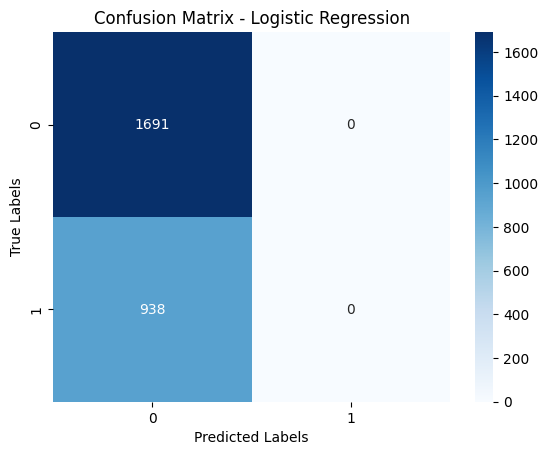

In [ ]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, logistic_regression_pred)
conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
classification_rep = classification_report(y_test, logistic_regression_pred)

print(f'Logistic Regression - Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

K-Nearest Neighbors - Accuracy: 0.5838721947508558
Confusion Matrix:
[[1280  411]
 [ 683  255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1691
           1       0.38      0.27      0.32       938

    accuracy                           0.58      2629
   macro avg       0.52      0.51      0.51      2629
weighted avg       0.56      0.58      0.56      2629



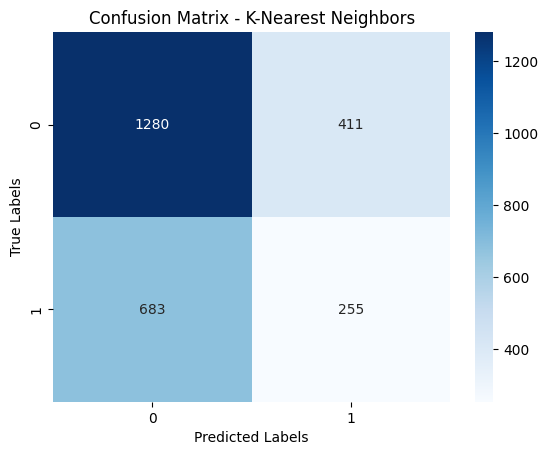

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
classification_rep = classification_report(y_test, knn_pred)

print(f'K-Nearest Neighbors - Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


Decision Tree - Accuracy: 0.5264359071890453
Confusion Matrix:
[[999 692]
 [553 385]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      1691
           1       0.36      0.41      0.38       938

    accuracy                           0.53      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.53      0.53      2629



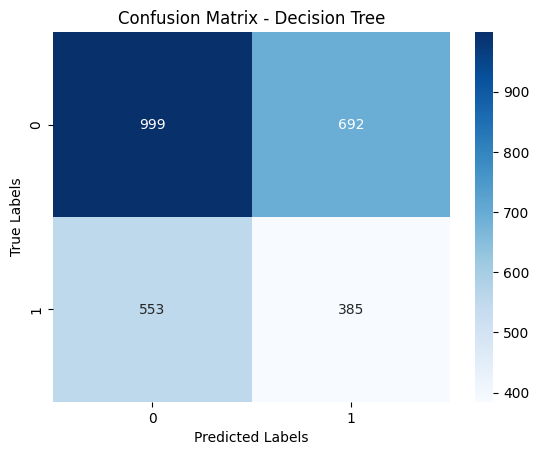

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, decision_tree_pred)
conf_matrix = confusion_matrix(y_test, decision_tree_pred)
classification_rep = classification_report(y_test, decision_tree_pred)

print(f'Decision Tree - Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
new_data=pd.DataFrame({
    'Age':62,
    'Sex':1,
    'Cholesterol':209,
    'Heart Rate':73,
    'Systolic':157,
    'Diastolic':87,
    'Diabetes':0,
    'Family History':0,
    'Smoking':0,
    'Obesity':0,
    'BMI':32,
    'Triglycerides':286,
    'Physical Activity Days Per Week':0,
    'Sleep Hours Per Day':6
}, index=[0])

In [ ]:
new_data

Age  Sex  Cholesterol  Heart Rate  Systolic  Diastolic  Diabetes  \
0   62    1          209          73       157         87         0   

   Family History  Smoking  Obesity  BMI  Triglycerides  \
0               0        0        0   32            286   

   Physical Activity Days Per Week  Sleep Hours Per Day  
0                                0                    6

In [ ]:
p=logistic_regression_model.predict(new_data)
if p[0]==0:
  print('no disease')
else:
    print('disease')

no disease


In [ ]:
import joblib

In [ ]:
joblib.dump(logistic_regression_model,'model_joblib_heart.pkl')

['model_joblib_heart.pkl']

In [ ]:
model =joblib.load('model_joblib_heart.pkl')
model.predict(new_data)

array([0])